In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from optbinning import OptimalBinning

from sklearn.linear_model import LogisticRegression

from optbinning import BinningProcess

from optbinning import Scorecard

from matplotlib import pyplot as plt
from optbinning.scorecard import plot_auc_roc, plot_ks


import plotly.graph_objects as go

In [2]:
a = pd.read_csv("C:/Users/kolkd/OneDrive/Desktop/financial analytics/Homework1_FA/accepted_customers.csv")
r = pd.read_csv("C:/Users/kolkd/OneDrive/Desktop/financial analytics/Homework1_FA/rejected_customers.csv")

In [138]:
gb_counts = a["GB"].value_counts()
print(gb_counts)

GB
0    1500
1    1500
Name: count, dtype: int64


In [132]:
print(f"Number of observations in r set: {r.shape[0]}")
print(f"Number of observations in a set: {a.shape[0]}")

Number of observations in r set: 1500
Number of observations in a set: 3000


In [3]:
a["_freq_"] = a["GB"].apply(lambda x: 30 if x == 0 else 1)

In [4]:
train_a, test_a = train_test_split(a, test_size = 0.3, random_state = 1234)

In [5]:
gb_counts = train_a["GB"].value_counts()
print(gb_counts)

GB
0    1055
1    1045
Name: count, dtype: int64


In [6]:

x = train_a.drop(["GB","_freq_"], axis=1)  
y = train_a["GB"]

colnames = list(x.columns)

selection_criteria = {"iv": {"min": 0.1, "max": 1}}

bin_proc = BinningProcess(colnames, selection_criteria = selection_criteria, categorical_variables = ["PRODUCT", "RESID", "NAT","PROF","CAR","CARDS"])
iv_all = bin_proc.fit(x, y).summary()

iv_all[iv_all.columns[0:6]].sort_values(by = ["iv"], ascending = False)


,name,dtype,status,selected,n_bins,iv
2,AGE,numerical,OPTIMAL,True,8,0.389083
8,INCOME,numerical,OPTIMAL,True,8,0.268925
21,CARDS,categorical,OPTIMAL,True,2,0.189327
4,TMJOB1,numerical,OPTIMAL,True,8,0.17702
1,PERS_H,numerical,OPTIMAL,True,4,0.176798
9,EC_CARD,numerical,OPTIMAL,True,2,0.157998
5,TEL,numerical,OPTIMAL,False,2,0.057385
0,CHILDREN,numerical,OPTIMAL,False,4,0.047069
19,PROF,categorical,OPTIMAL,False,4,0.045712
3,TMADD,numerical,OPTIMAL,False,4,0.040261


In [7]:


estimator = LogisticRegression(solver = "lbfgs")

scorecard = Scorecard(binning_process = bin_proc,
                      estimator = estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 50, 
                      "scorecard_points": 500, "odds": 20})
                      
scorecard.fit(x, y, sample_weight=train_a["_freq_"])

Scorecard(binning_process=BinningProcess(categorical_variables=['PRODUCT',
                                                                'RESID', 'NAT',
                                                                'PROF', 'CAR',
                                                                'CARDS'],
                                         selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.1}},
                                         variable_names=['CHILDREN', 'PERS_H',
                                                         'AGE', 'TMADD',
                                                         'TMJOB1', 'TEL',
                                                         'NMBLOAN', 'FINLOAN',
                                                         'INCOME', 'EC_CARD',
                                                         'BUREAU', 'LOCATION',
                                                         'LOANS', 'REGN', 'DIV',
                                                         'CASH', 'PRODUCT',
                                                         'RESID', 'NAT', 'PROF',
                                                         'CAR', 'CARDS']),
          estimator=LogisticRegression(), scaling_method='pdo_odds',
          scaling_method_params={'odds': 20, 'pdo': 50,
                                 'scorecard_points': 500})

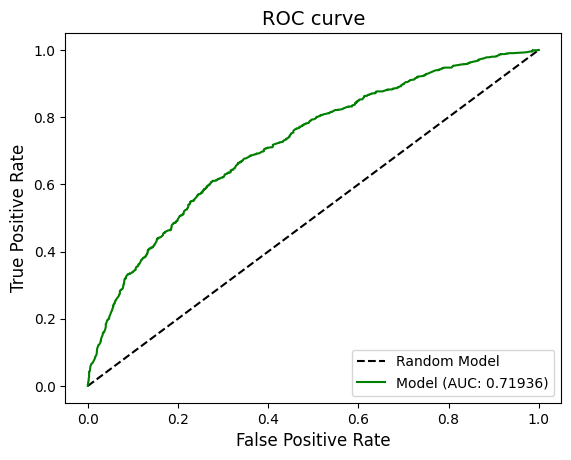

In [8]:
y_pred = scorecard.predict_proba(x)[:, 1]

plot_auc_roc(y, y_pred)

plt.show()

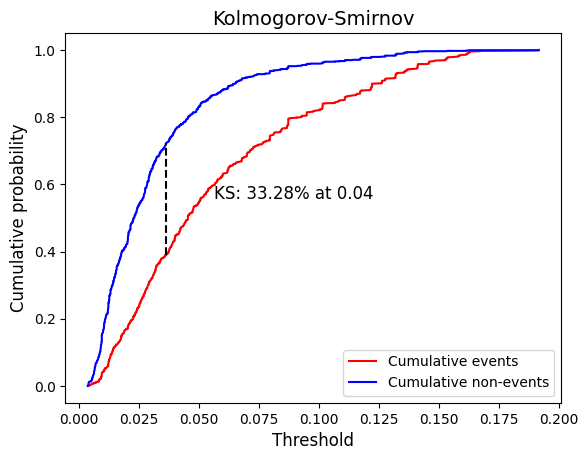

In [9]:
plot_ks(y, y_pred)

plt.show()

In [10]:
X_r = r

r["y_pred"] = scorecard.predict_proba(X_r)[:, 1]

r["GB"] = (r["y_pred"] > 0.04).astype(int)
r["_freq_"] = r["GB"].apply(lambda x: 30 if x == 0 else 1)

r = r.drop("y_pred", axis=1)

gb_counts = r["GB"].value_counts()
print(gb_counts)

comb_hard = pd.concat([a, r.head(1000)], ignore_index=True)

comb_hard.shape[0]

GB
1    791
0    709
Name: count, dtype: int64


4000

In [11]:
gb_counts = comb_hard["GB"].value_counts()
print(gb_counts)

GB
1    2075
0    1925
Name: count, dtype: int64


In [12]:
train_aC, test_aC = train_test_split(comb_hard, test_size = 0.3, random_state = 1234)

In [15]:
x = train_aC.drop(["GB","_freq_"], axis=1)  
y = train_aC["GB"]

colnames = list(x.columns)

selection_criteria = {"iv": {"min": 0.1, "max": 1}}

bin_proc = BinningProcess(colnames, selection_criteria = selection_criteria, categorical_variables = ["PRODUCT", "RESID", "NAT","PROF","CAR","CARDS"])

estimator = LogisticRegression(solver = "lbfgs")

scorecard = Scorecard(binning_process = bin_proc,
                      estimator = estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 50, 
                      "scorecard_points": 500, "odds": 20})
                      
scorecard.fit(x, y, sample_weight=train_aC["_freq_"])

Scorecard(binning_process=BinningProcess(categorical_variables=['PRODUCT',
                                                                'RESID', 'NAT',
                                                                'PROF', 'CAR',
                                                                'CARDS'],
                                         selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.1}},
                                         variable_names=['CHILDREN', 'PERS_H',
                                                         'AGE', 'TMADD',
                                                         'TMJOB1', 'TEL',
                                                         'NMBLOAN', 'FINLOAN',
                                                         'INCOME', 'EC_CARD',
                                                         'BUREAU', 'LOCATION',
                                                         'LOANS', 'REGN', 'DIV',
                                                         'CASH', 'PRODUCT',
                                                         'RESID', 'NAT', 'PROF',
                                                         'CAR', 'CARDS']),
          estimator=LogisticRegression(), scaling_method='pdo_odds',
          scaling_method_params={'odds': 20, 'pdo': 50,
                                 'scorecard_points': 500})

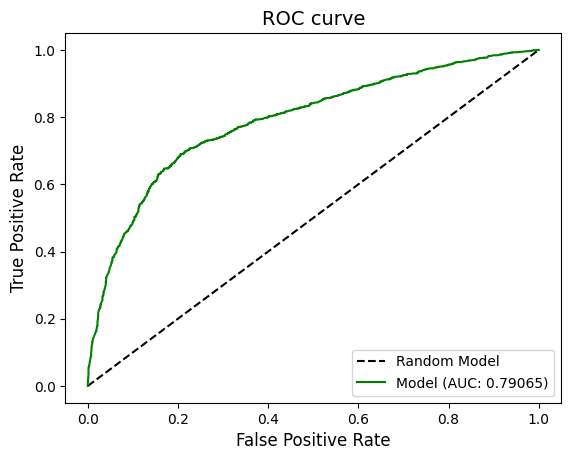

In [16]:
y_pred = scorecard.predict_proba(x)[:, 1]

plot_auc_roc(y, y_pred)

plt.show()

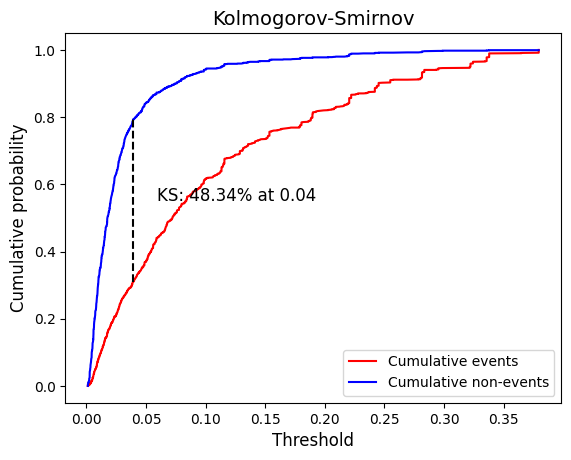

In [17]:
plot_ks(y, y_pred)

plt.show()

In [23]:
test_aC['cost'] = test_aC['GB'].apply(lambda x: 52000 if x== 1 else 0)

In [25]:
test_aC['revenue'] = test_aC['GB'].apply(lambda x: 2000 if x==0 else 0)

C:\Users\kolkd\AppData\Local\Temp\ipykernel_22508\1724432318.py:26: RuntimeWarning: invalid value encountered in scalar divide
  default_rate = (total_defaults / total_accepted) * 100
C:\Users\kolkd\AppData\Local\Temp\ipykernel_22508\1724432318.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(cutoffs, default_rates, 'r-', label='Default Rate (Accepted)', color='red')  # 'g-' is green solid line
C:\Users\kolkd\AppData\Local\Temp\ipykernel_22508\1724432318.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(cutoffs, accept_rates, 'b-', label='Acceptance Rate', color='blue')  # 'b-' is blue solid line


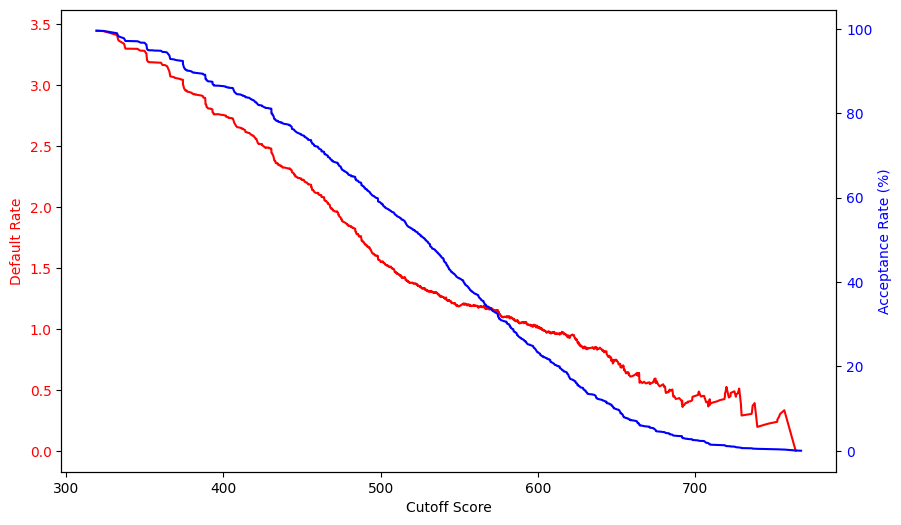

Acceptance Rates: [99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.55000000000001, 99.55000000000001, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.375, 98.225, 98.225, 98.225, 98.225, 98.225, 98.225, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.8, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.35000000000001, 97.175, 97.175, 97.175,

In [ ]:
comb_hard["score"] = scorecard.score(comb_hard)

scores = comb_hard['score']
GB = comb_hard['GB'] 

sorted_scores = np.sort(scores)


cutoffs = []
default_rates = []
accept_rates = []

for cutoff in sorted_scores:

    accepted = scores > cutoff
    
  
    accept_rate = accepted.mean() * 100 
    
   
    accepted_GB = GB[accepted]  
    total_defaults = (accepted_GB == 1).sum()  
    total_accepted = (((accepted_GB==0).sum())*30) + ((accepted_GB == 1).sum() * 1)   
    
  
    default_rate = (total_defaults / total_accepted) * 100  
    
    cutoffs.append(cutoff)
    default_rates.append(default_rate)
    accept_rates.append(accept_rate)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis data (default rate)
ax1.plot(cutoffs, default_rates, 'r-', label='Default Rate (Accepted)', color='red')  # 'g-' is green solid line
ax1.set_xlabel('Cutoff Score')
ax1.set_ylabel('Default Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create the second y-axis sharing the same x-axis (acceptance rate)
ax2 = ax1.twinx()
ax2.plot(cutoffs, accept_rates, 'b-', label='Acceptance Rate', color='blue')  # 'b-' is blue solid line
ax2.set_ylabel('Acceptance Rate (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Show the plot
plt.show()

print("Default Rates among Accepted Individuals:", default_rates)


The cutoff with the highest profit is 513.8184702780624 with a profit of 57540000.


C:\Users\kolkd\AppData\Local\Temp\ipykernel_22508\3671362883.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(cutoffs, profits, 'b-', label='Profit', color='blue')
C:\Users\kolkd\AppData\Local\Temp\ipykernel_22508\3671362883.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(cutoffs, accept_rates, 'r-', label='Acceptance Rate', color='red')


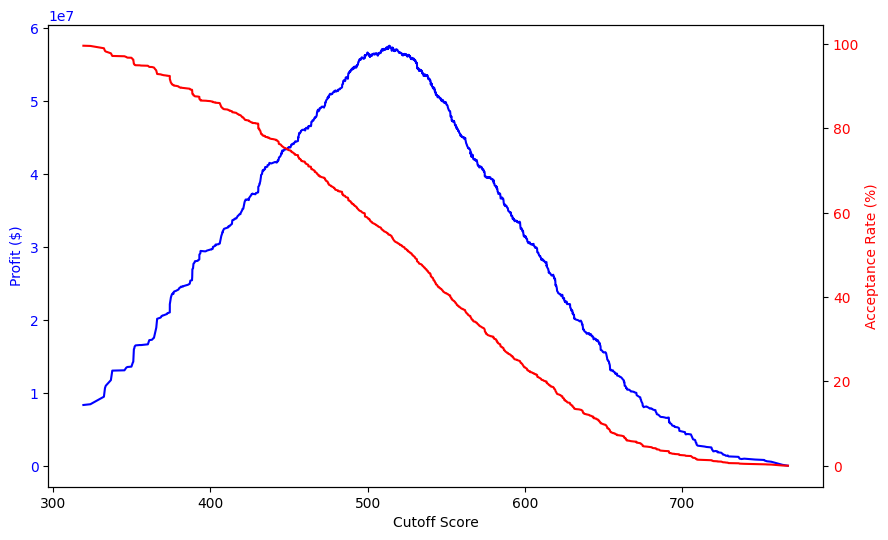

In [36]:
comb_hard["score"] = scorecard.score(comb_hard)


GB = comb_hard['GB'] 
scores = comb_hard['score']
sorted_scores = np.sort(scores)




cutoffs = []
profits = []
accept_rates = []

for cutoff in sorted_scores:

    accepted = scores > cutoff
    
  
    accept_rate = accepted.mean() * 100 
    
   
    accepted_GB = GB[accepted]  
    total_defaults_cost = (accepted_GB == 1).sum() * 52000
    total_accepted_revenue = (((accepted_GB==0).sum())*30) * 2000
    
  
    profit = total_accepted_revenue - total_defaults_cost
  
    cutoffs.append(cutoff)
    profits.append(profit)
    accept_rates.append(accept_rate)


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first y-axis data (default rate)
ax1.plot(cutoffs, profits, 'b-', label='Profit', color='blue')  
ax1.set_xlabel('Cutoff Score')
ax1.set_ylabel('Profit ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Create the second y-axis sharing the same x-axis (acceptance rate)
ax2 = ax1.twinx()
ax2.plot(cutoffs, accept_rates, 'r-', label='Acceptance Rate', color='red') 
ax2.set_ylabel('Acceptance Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

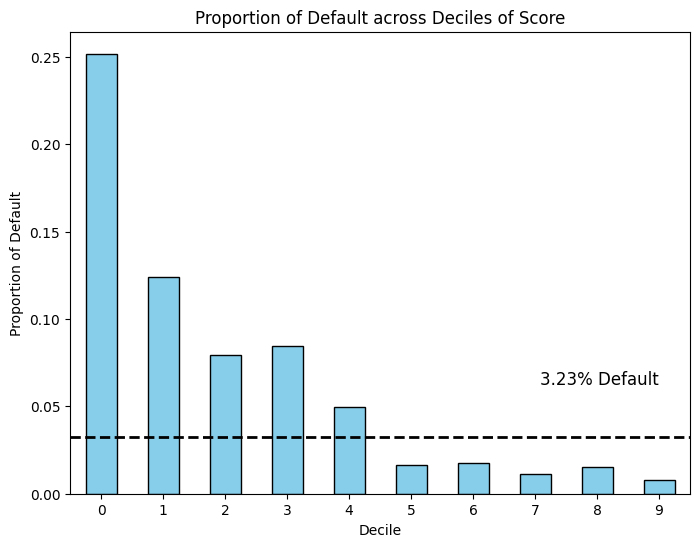

In [37]:
test_aC["score"] = scorecard.score(test_aC)
test_aC['decile'] = pd.qcut(test_aC["score"], 10, labels = False)

PD = test_aC[test_aC['GB'] == 1].groupby('decile').size() / (test_aC[test_aC['GB'] == 0].groupby('decile').size() * 30 + test_aC[test_aC['GB'] == 1].groupby('decile').size())


plt.figure(figsize = (8, 6))
PD.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.axhline(y = 0.0323, color = 'black', linestyle = '--', linewidth = 2)
plt.text(x = 9, y = 0.06, s = '3.23% Default', color = 'black', ha = 'right', va = 'bottom', fontsize = 12)

plt.title('Proportion of Default across Deciles of Score')
plt.xlabel('Decile')
plt.ylabel('Proportion of Default')
plt.xticks(rotation = 0)